### Zgodnie z ustaleniami z Profesorem Baranowskim plik przesłany z opóźnieniem, z racji na późniejsze przepisanie się na specjalizację 
# 402037 - Kamil Pieprzycki
## Lab 1 - Random data visualisation and sampling


In [1]:
import numpy as np
RNG = np.random.default_rng()
from scipy import stats
import matplotlib.pyplot as plt

##EX. 2

In [2]:

# 1000 samples of uniform distribution on interval [0, 1]
un = RNG.uniform(0,1,1000) 
# 1000 samples of normal distribution with mean = 0 and standard deviation = 1.
normal = RNG.normal(0, 1, size=1000)
# 1000 samples of normal distribution with mean = 0 and standard deviation = 10 .
normal10 = RNG.normal(0, 10, size=1000)
# 1000 samples of beta distribution for the following pairs of parameters (a, b) in (1,1) (2,2) (3,9).
beta11 = RNG.beta(1,1,1000)
beta22 = RNG.beta(2,2,1000)
beta39 = RNG.beta(3,9,1000)
# 10000 samples of two-dimensional normal distributions each with mean = [0,0]^T and given covariance matrices
mean = np.array([0,0])
covar1 = np.array([[1,0],
                   [0,1]])
covar2 = np.array([[2,1],[1,2]])
normal2D1 = RNG.multivariate_normal(mean,covar1,10000)
normal2D2 = RNG.multivariate_normal(mean,covar2,10000)



In [3]:
print(len(normal2D1))

10000


##EX. 3 - Comparison of the sampled values and ideal values of one dimensional distributions

In [4]:
def plot_hist(array, v,pdf, title, bins='auto'):
  fig, ax = plt.subplots()
  ax.hist(array, bins, density=True,label="sampled")
  ax.plot(v,pdf,label="analytical")
  ax.legend()
  ax.set_title(title)
  ax.grid()



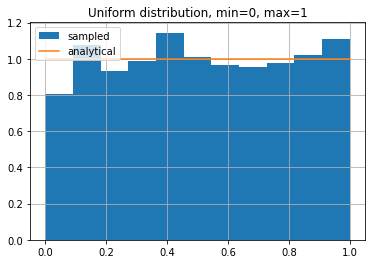

In [5]:
v = np.linspace(0, 1, 2)
pdf = stats.uniform.pdf(v)
plot_hist(un, np.array([0, 1]), pdf, "Uniform distribution, min=0, max=1")

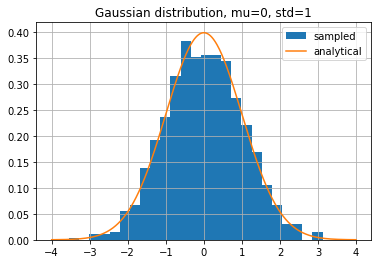

In [6]:
v = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(v, 0, 1)

plot_hist(normal, v, pdf, "Gaussian distribution, mu=0, std=1")

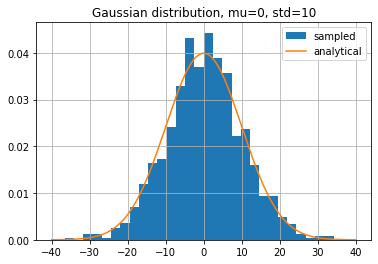

In [7]:
v = np.linspace(-40, 40, 1000)
pdf = stats.norm.pdf(v, 0, 10)
plot_hist(normal10, v, pdf, "Gaussian distribution, mu=0, std=10")

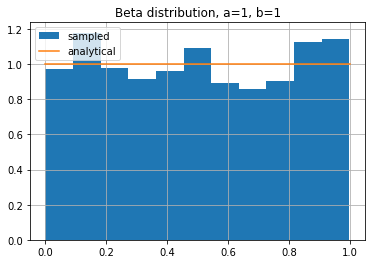

In [8]:
v = np.linspace(0, 1, 1000)
pdf11 = stats.beta.pdf(v, 1, 1)
plot_hist(beta11, v, pdf11, "Beta distribution, a=1, b=1")

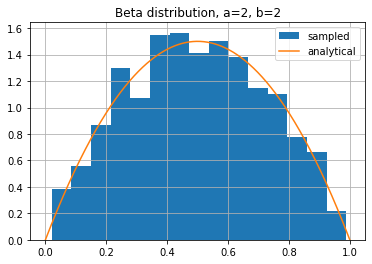

In [9]:
v = np.linspace(0, 1, 1000)
pdf22 = stats.beta.pdf(v, 2, 2)
plot_hist(beta22, v, pdf22, "Beta distribution, a=2, b=2")

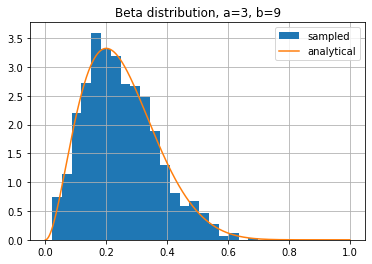

In [10]:
v = np.linspace(0, 1, 1000)
pdf39 = stats.beta.pdf(v, 3, 9)
plot_hist(beta39, v, pdf39, "Beta distribution, a=3, b=9")

##EX. 4 - 2D distributions with different number of bins 


###Influence of the bins count in histogram

In [11]:
def plot_hist2d(arraylike, bins):
    fig, ax = plt.subplots()
    ax.set_aspect("equal")
    _, _, _, val = ax.hist2d(arraylike[:,0], arraylike[:,1], bins=bins)
    ax.set_title(f"2D normal distribution, {bins} bins")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    fig.colorbar(val, ax=ax)
   

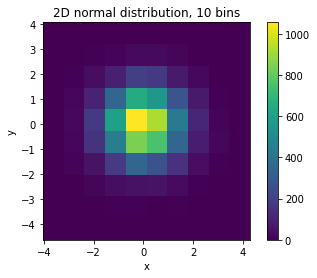

In [12]:
plot_hist2d(normal2D1, 10)

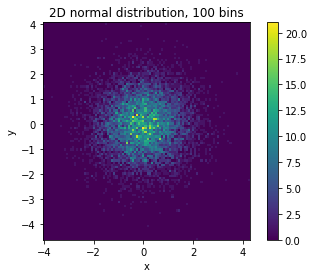

In [13]:
plot_hist2d(normal2D1, 100)

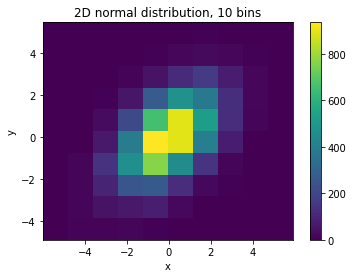

In [14]:
plot_hist2d(normal2D2, 10)

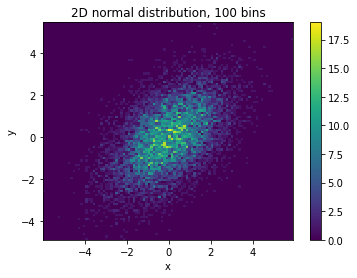

In [15]:
plot_hist2d(normal2D2, 100)


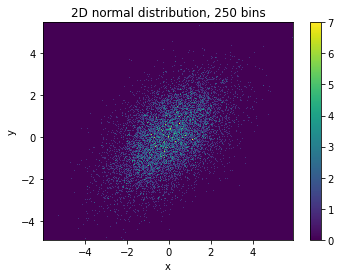

In [16]:
plot_hist2d(normal2D2,250)

###Seaborn histogram function


Text(0.5, 1.0, 'Normal 2D distribution')

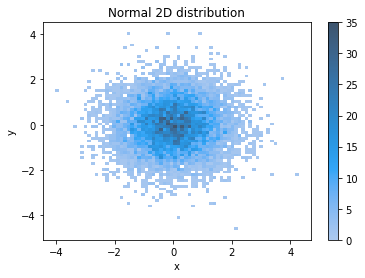

In [17]:
import seaborn
import pandas
pom1 = pandas.DataFrame(normal2D1, columns=["x", "y"])
seaborn.histplot(pom1,x="x", y="y", cbar=True)
plt.title("Normal 2D distribution")

## EX. 5


In [18]:
l=1000
alfa=RNG.normal(2,0.1,l)
beta=RNG.normal(0.2,0.2,l)
x=RNG.normal(0,3,l)
sigma=np.abs(RNG.normal(0,1,l))
luu=alfa+beta*x

y=RNG.normal(luu,sigma)

##EX. 6

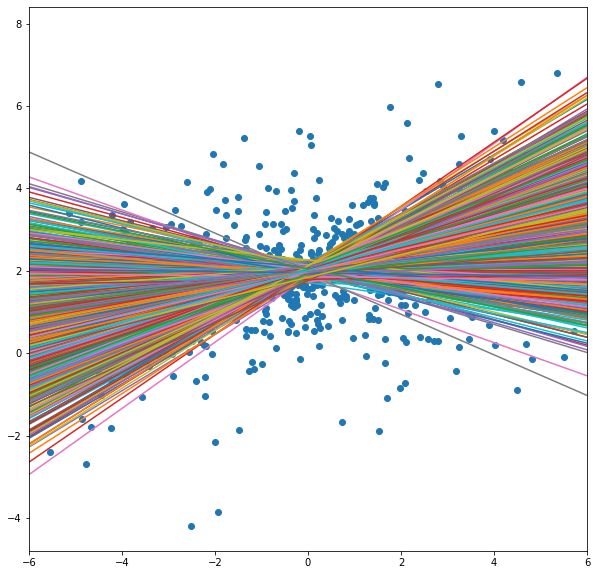

In [19]:
sus = np.linspace(-6,6,1000).reshape((-1,1))

fig, ax = plt.subplots()
fig.set_size_inches((10,10))
ax.scatter(x,y)
ax.plot(np.ones((1, 1000))*sus,alfa+sus*beta)
ax.set_xlim([-6,6])
print()
